In [2]:
#The goal of this example is to predict the salary of employees based on for how long they have been employed

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [3]:
path = 'datasets/'
file = 'Salary_dataset.csv'
df = pd.read_csv(path + file)

#data cleaning
df = df.dropna()
df = df.drop(['Unnamed: 0'], axis=1)

#confirm that all remaining features are float    
print(df.dtypes)
print(df.shape)
print(df.head())

YearsExperience    float64
Salary             float64
dtype: object
(30, 2)
   YearsExperience   Salary
0              1.2  39344.0
1              1.4  46206.0
2              1.6  37732.0
3              2.1  43526.0
4              2.3  39892.0


In [4]:
#select the independent variable
X = df['YearsExperience']
# Select the dependent variable
y = df['Salary']

#reshape to accepted LinearRegression format
X = X.to_numpy()
X = X.reshape(-1, 1)
y = y.to_numpy()
y = y.reshape(-1, 1)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
# Create an instance of the LinearRegression model and train it
model = LinearRegression().fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate the R-squared score
r2_train = model.score(X_train, y_train)
r2_test = model.score(X_test, y_test)

# Print the R-squared score for trainning and testing
print("Train R-squared score (1 is perfect, 0 is worst possible fit): ", r2_train)
print("Test R-squared score (1 is perfect, 0 is worst possible fit): ", r2_test)

Train R-squared score (1 is perfect, 0 is worst possible fit):  0.9645401573418148
Test R-squared score (1 is perfect, 0 is worst possible fit):  0.9024461774180497


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


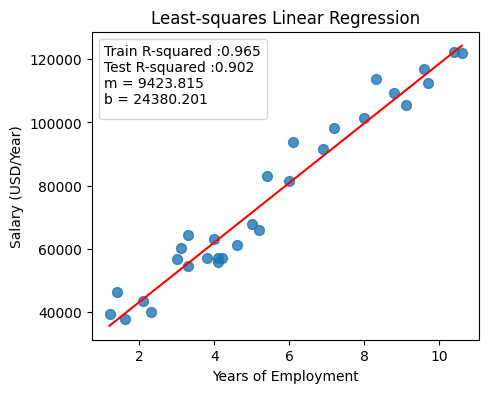

In [6]:
# Do a scatter plot showing the least squares straight line

plt.figure(figsize=(5,4))
plt.scatter(X, y, marker= 'o', s=50, alpha=0.8)
plt.plot(X, model.coef_ * X + model.intercept_, 'r-')
plt.title('Least-squares Linear Regression')
plt.xlabel('Years of Employment')
plt.ylabel('Salary (USD/Year)')
plt.legend(title = 'Train R-squared :'+str(np.around(r2_train, 3))+'\nTest R-squared :'+str(np.around(r2_test, 3))+
           '\nm = '+str(np.around(model.coef_[0][0],3))+'\nb = '+str(np.around(model.intercept_[0],3)), loc = 'upper left')
plt.show()